# Demo the DFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## DFT and its inverse

In [2]:
def DFT(x):
    '''
    DFT    Compute the Discrete Fourier Transform
        Input:
          x  : discrete-time signal in an array
        Output:
          X  : DFT of the input signal x
    '''
    N = len(x)
    W_N = np.exp(1j * 2 * np.pi / N)
    
    X = np.zeros_like(x, dtype=complex) # data types: important in Python!!

    for k in range(len(X)):
        # Compute the DFT sum over signal samples in x
        for n in range(len(x)):
            X[k] = X[k] + x[n] * W_N**(-k * n)  
            
    return X


def IDFT(X):
    '''
    IDFT    Compute the Inverse Discrete Fourier Transform
        Input:
          X  : DFT coefficients of a signal
        Output:
          x  : the inverse DFT of the input X
    '''
    N = len(X)
    W_N = np.exp(1j * 2 * np.pi / N)
    
    x = np.zeros_like(X, dtype=complex) # data types: important in Python!!

    for n in range(len(x)):
        # Compute the IDFT sum over DFT coefficients in X
        for k in range(len(X)):
            x[n] = x[n] + X[k] * W_N**(k * n)  
            
        x[n] = x[n] / N
        
    return x

## DTFT

In [3]:
def DTFT(x, w, n0 = 0):
    '''
    DTFT    Compute the Discrete-Time Fourier Transform of a signal
        Input:
          x  : discrete-time signal in an array
          n0 : index of the signal corresponding to the sample x[0]
          w  : array of frequencies that we want to compute DTFT
               for example: w = np.linspace(-pi,pi,100)
        Output:
          X  : DTFT coefficients at the specified frequencies w
    '''
    X = np.zeros_like(w,dtype=complex) # data types: important in Python!!
    # For each frequency in w
    for k in range(len(w)):
        # Compute the DTFT sum over signal samples
        X[k] = 0
        for n in range(len(x)):
            X[k] = X[k] + x[n] * np.exp(-1j * w[k] * (n - n0))
            
    return X

## Example signal

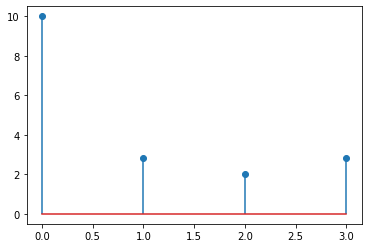

In [4]:
x = np.array([1, 2, 3, 4])
X = DFT(x) # Compute the DFT of x
plt.stem(np.abs(X));

Text(0.5, 1.0, '$|xr - x|$')

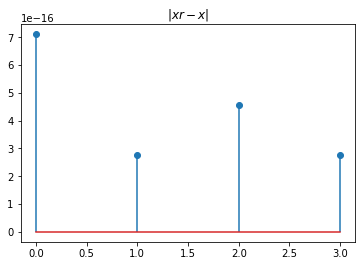

In [5]:
# Reconstruct the signal via inverse DFT
xr = IDFT(X)
plt.stem(np.abs(xr - x))
plt.title('$|xr - x|$')

### Circular shift

Text(0.5, 1.0, '$\\angle(Y[k]/X[k])$')

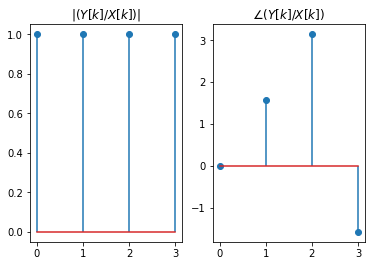

In [6]:
y = np.array([2, 3, 4, 1])
Y = DFT(y) # Compute the DFT of x

plt.subplot(1,2,1)
plt.stem(np.abs(Y/X));
plt.title('$|(Y[k]/X[k])|$')

plt.subplot(1,2,2)
plt.stem(np.angle(Y/X));
plt.title(r'$\angle(Y[k]/X[k])$')

### Zero padding

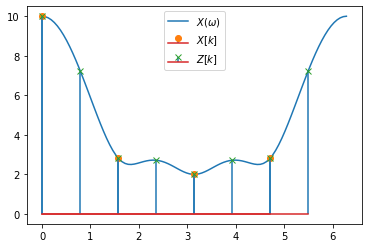

In [7]:
z = np.array([1, 2, 3, 4, 0, 0, 0, 0])
Z = DFT(z) # Compute the DFT of Z

w = np.linspace(0, 2*np.pi,100)
Xw = DTFT(x, w)

plt.plot(w, np.abs(Xw))
plt.stem(np.arange(4)*2*np.pi/4, np.abs(X), markerfmt='o')
plt.stem(np.arange(8)*2*np.pi/8, np.abs(Z), markerfmt='x')
plt.legend(['$X(\omega)$', '$X[k]$', '$Z[k]$'])

# DFT Application 1: Signal Compression

In [8]:
from scipy import signal
from scipy.io.wavfile import read
from IPython.display import Audio

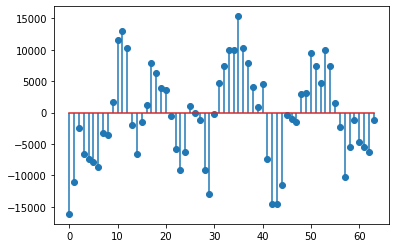

In [10]:
# Load a signal, and extract a window
fs, s = read('resources/handel.wav')
N = 64;
x = s[10000:10000+N]
plt.stem(x);

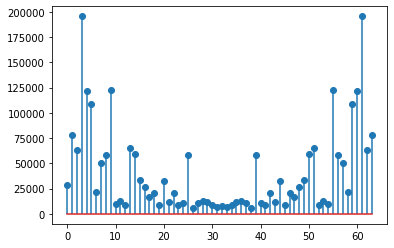

In [11]:
X = DFT(x)
plt.stem(np.abs(X));

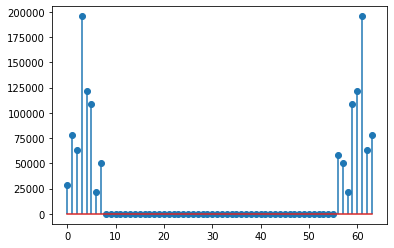

In [12]:
# Only keep 1/8 of low-frequency DFT coefficients; zero out the rest
Y = X
K = int(N/8)
Y[K:N-K] = 0
plt.stem(np.abs(Y));

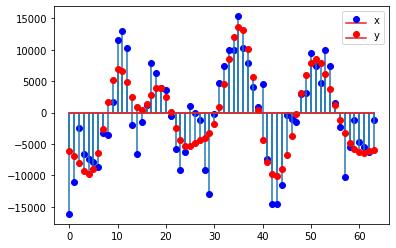

In [13]:
# Reconstruct
y = np.real(IDFT(Y))

px = plt.stem(x, markerfmt='bo')
py = plt.stem(y, markerfmt='ro')
plt.legend(['x', 'y']);

# DFT Application 2: Spectral Analysis

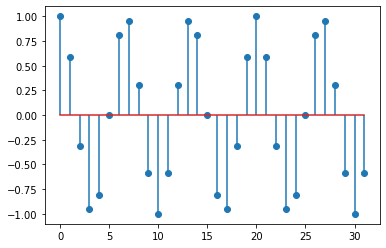

In [14]:
W = 30 * np.pi
T = 1/100
N = 32;
n = np.arange(N)
x = np.cos(W*T*n)
plt.stem(x);

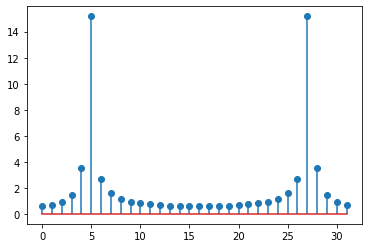

In [15]:
X = DFT(x)
plt.stem(np.abs(X));

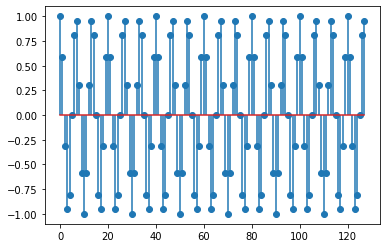

In [16]:
N = 128;
n = np.array(range(N))
x = np.cos(W*T*n)
plt.stem(x);

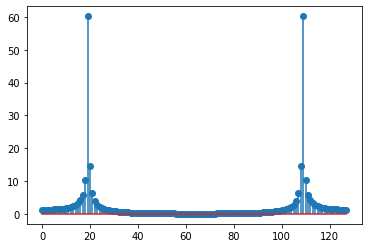

In [17]:
X = DFT(x)
plt.stem(np.abs(X));

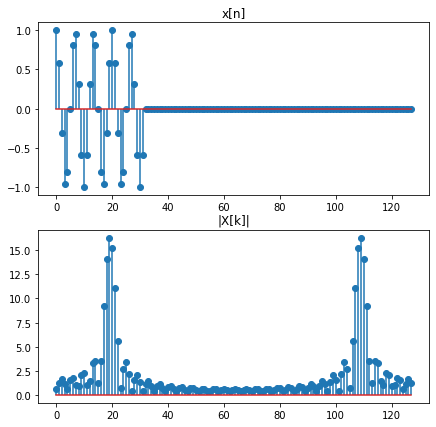

In [18]:
W = 30 * np.pi
T = 1/100
N = 32;
n = np.array(range(N))
x = np.cos(W*T*n)

xz = np.pad(x, (0, 96), 'constant', constant_values=(0,0))

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(xz); plt.title('x[n]')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(xz))); plt.title('|X[k]|');

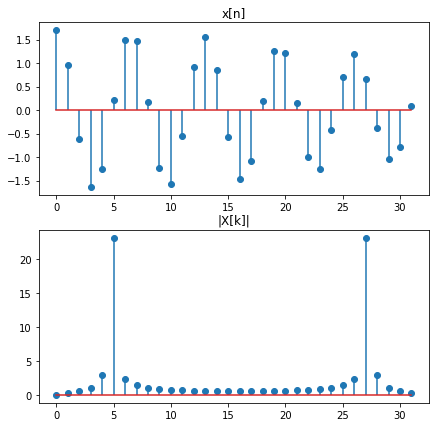

In [19]:
# Signal with 2 frequencies
W1 = 30 * np.pi
W2 = 32 * np.pi
T = 1/100
N = 32;
n = np.array(range(N))
x = np.cos(W1*T*n) + 0.7*np.cos(W2*T*n)

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(x); plt.title('x[n]')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(x))); plt.title('|X[k]|');

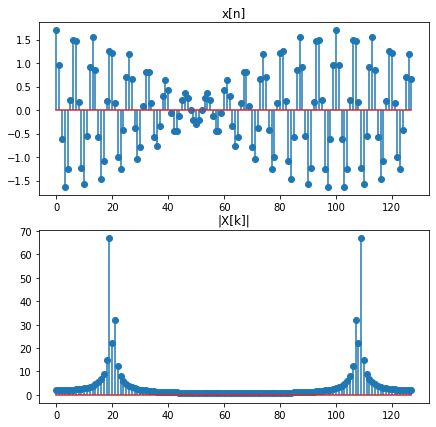

In [20]:
# Longer window of samples
W1 = 30 * np.pi
W2 = 32 * np.pi
T = 1/100
N = 128;
n = np.array(range(N))
x = np.cos(W1*T*n) + 0.7*np.cos(W2*T*n)

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(x); plt.title('x[n]')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(x))); plt.title('|X[k]|');

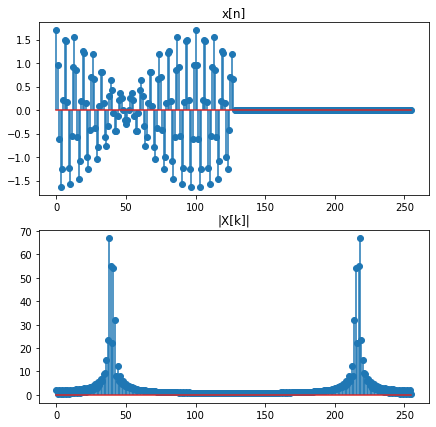

In [21]:
# Zero padding
xz = np.pad(x, (0, 128), 'constant', constant_values=(0,0))

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(xz); plt.title('x[n]')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(xz))); plt.title('|X[k]|');

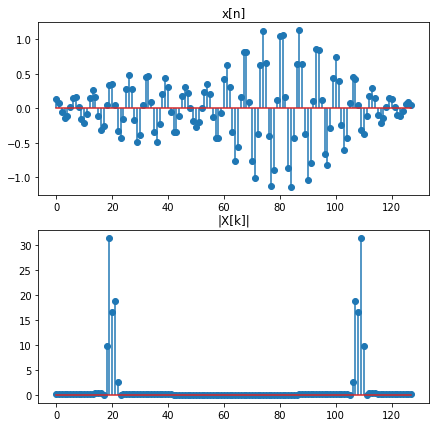

In [22]:
# Windowing
w = np.hamming(N)
xw = np.multiply(x, w)

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(xw); plt.title('x[n]')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(xw))); plt.title('|X[k]|');

# DTFT, DFT, and Windowing Effects

In [23]:
N = 16
n = np.array(range(N))
win_rect = np.ones(N)
win_hamm = np.hamming(N)

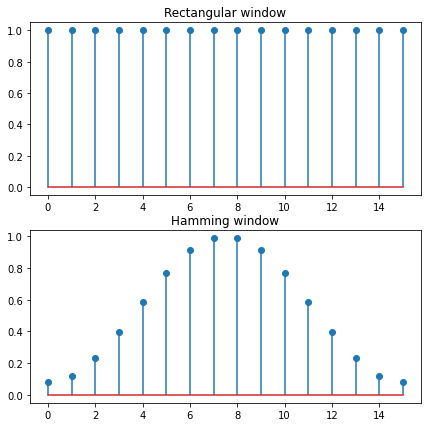

In [24]:
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(win_rect); plt.title('Rectangular window')
plt.subplot(2,1,2)
plt.stem(win_hamm); plt.title('Hamming window');

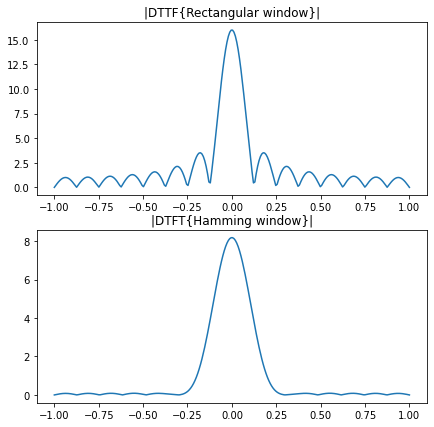

In [25]:
w = np.linspace(-np.pi, np.pi, 256)
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.plot(w / np.pi, np.abs(DTFT(win_rect, w))); plt.title('|DTTF{Rectangular window}|')
plt.subplot(2,1,2)
plt.plot(w / np.pi, np.abs(DTFT(win_hamm, w))); plt.title('|DTFT{Hamming window}|');

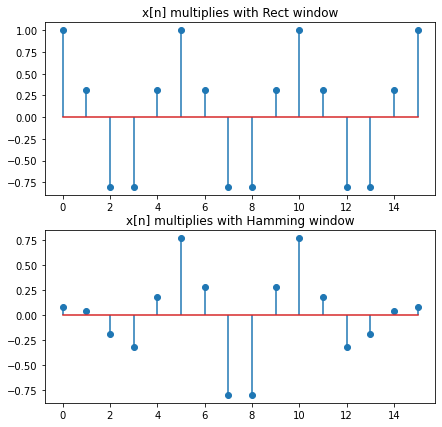

In [26]:
w0 = 0.4 * np.pi
x = np.cos(w0 * n)
x_rect = np.multiply(x, win_rect)
x_hamm = np.multiply(x, win_hamm)

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(x_rect); plt.title('x[n] multiplies with Rect window')
plt.subplot(2,1,2)
plt.stem(x_hamm); plt.title('x[n] multiplies with Hamming window');

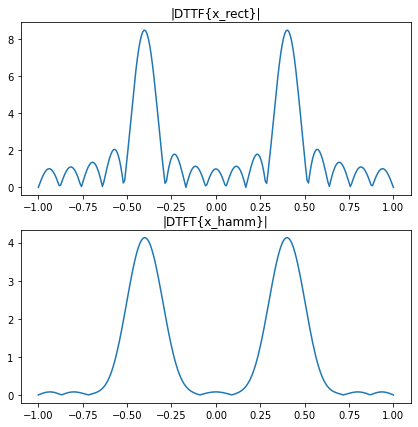

In [27]:
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.plot(w / np.pi, np.abs(DTFT(x_rect, w))); plt.title('|DTTF{x_rect}|')
plt.subplot(2,1,2)
plt.plot(w / np.pi, np.abs(DTFT(x_hamm, w))); plt.title('|DTFT{x_hamm}|');

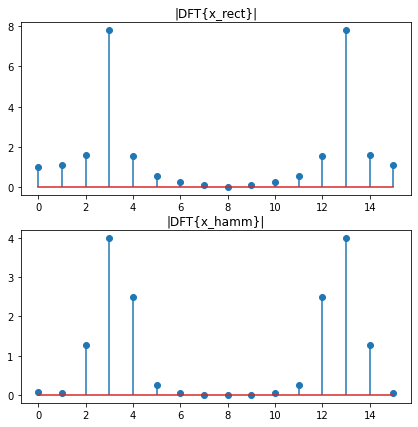

In [28]:
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(np.abs(DFT(x_rect))), plt.title('|DFT{x_rect}|')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(x_hamm))), plt.title('|DFT{x_hamm}|');

# Spectral Analysis: Revisit

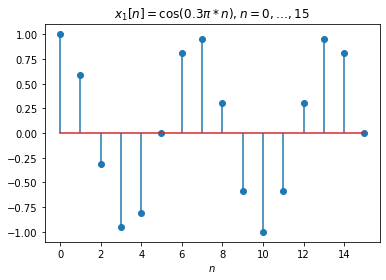

In [29]:
N = 16;
w0 = 0.3*np.pi
n = np.array(range(N))
x1 = np.cos(w0*n)
plt.stem(x1)
plt.xlabel('$n$')
plt.title('$x_1[n] = \cos(0.3 \pi  * n), n = 0,\ldots,15$');

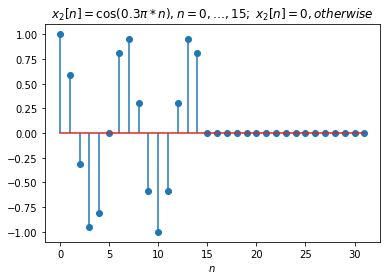

In [30]:
x2 = np.pad(x1, (0, N), 'constant', constant_values=(0,0))
plt.stem(x2)
plt.xlabel('$n$')
plt.title('$x_2[n] = \cos(0.3 \pi * n), n = 0,\ldots,15; \; x_2[n] = 0, otherwise$');

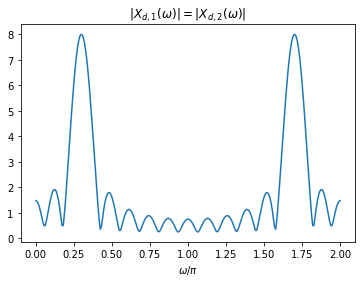

In [31]:
w = np.linspace(0, 2*np.pi, 256)
plt.plot(w / np.pi, np.abs(DTFT(x1, w)))
plt.title('$|X_{d,1}(\omega)| = |X_{d,2}(\omega)|$')
plt.xlabel('$\omega / \pi$');

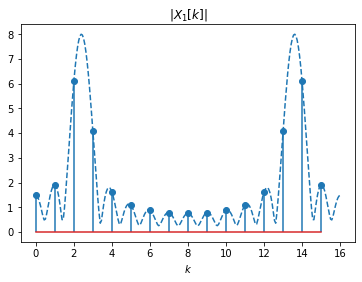

In [32]:
plt.stem(np.abs(DFT(x1)))
plt.title('$|X_1[k]|$')
plt.xlabel('$k$')
plt.plot(w / (2*np.pi) * N, np.abs(DTFT(x1, w)), '--')
plt.show;

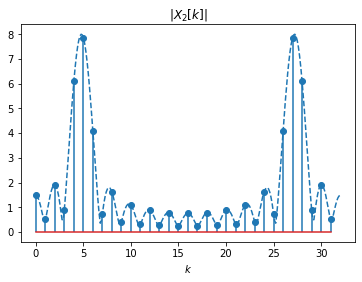

In [33]:
plt.stem(np.abs(DFT(x2)))
plt.title('$|X_2[k]|$')
plt.xlabel('$k$')
plt.plot(w / (2*np.pi) * (2 * N), np.abs(DTFT(x2, w)), '--')
plt.show;

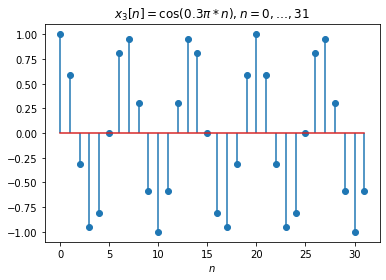

In [34]:
n = np.array(range(2*N))
x3 = np.cos(w0*n)
plt.stem(x3)
plt.xlabel('$n$')
plt.title('$x_3[n] = \cos(0.3 \pi  * n), n = 0,\ldots,31$');

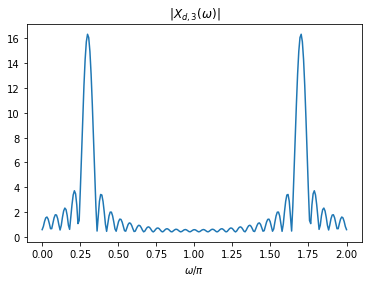

In [35]:
Xd3 = DTFT(x3, w)
plt.plot(w / np.pi, np.abs(Xd3))
plt.title('$|X_{d,3}(\omega)|$')
plt.xlabel('$\omega / \pi$');

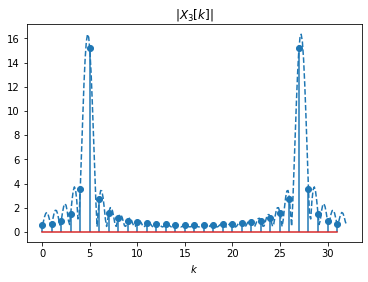

In [36]:
plt.stem(np.abs(DFT(x3)))
plt.title('$|X_3[k]|$')
plt.xlabel('$k$')
plt.plot(w / (2 *np.pi) * (2 * N), np.abs(DTFT(x3, w)), '--')
plt.show;

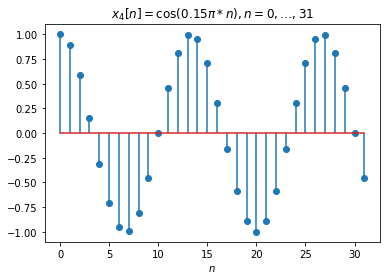

In [37]:
# Effect of changing the sampling period T -> T/2
w0 = w0 / 2.0
n = np.array(range(2*N))
x4 = np.cos(w0*n)
plt.stem(x4)
plt.xlabel('$n$')
plt.title('$x_4[n] = \cos(0.15 \pi  * n), n = 0,\ldots,31$');

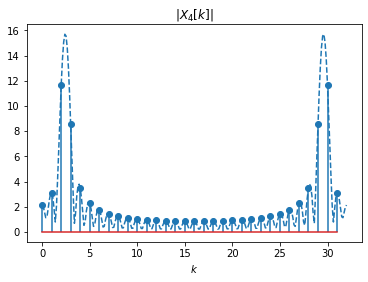

In [38]:
plt.stem(np.abs(DFT(x4)))
plt.title('$|X_4[k]|$')
plt.xlabel('$k$')
plt.plot(w / (2 *np.pi) * (2 * N), np.abs(DTFT(x4, w)), '--')
plt.show;